# Tennis Ace

This data is from the men's professional tennis league called [ATP(Association of Tennis Professionals).]( https://www.atptour.com/en) In this project, I'll be using linear regression models to investigate what features are most important for being a successful tennis player.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load and investigate data
tennis_df = pd.read_csv('tennis_stats.csv')
pd.set_option('display.max_columns', None) # This will eliminate column trucation
tennis_df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
tennis_df.shape # Total number of rows and columns

(1721, 24)

The ATP men’s tennis dataset above includes a wide array of tennis statistics, which are described below:
# Identifying Data
* `Player`: name of the tennis player
* `Year`: year data was recorded
# Service Game Columns (Offensive)
* `Aces`: number of serves by the player where the receiver does not touch the ball
* `DoubleFaults`: number of times player missed both first and second serve attempts
* `FirstServe`: % of first-serve attempts made
* `FirstServePointsWon`: % of first-serve attempt points won by the player
* `SecondServePointsWon`: % of second-serve attempt points won by the player
* `BreakPointsFaced`: number of times where the receiver could have won service game of the player
* `BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance
* `ServiceGamesPlayed`: total number of games where the player served
* `ServiceGamesWon`: total number of games where the player served and won
* `TotalServicePointsWon`: % of points in games where the player served that they won
# Return Game Columns (Defensive)
* `FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win
* `SecondServeReturnPointsWon`: % of opponents second-serve points the player was able to win
* `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent
* `BreakPointsConverted`: % of the time the player was able to win their opponent’s service game when they had the chance
* `ReturnGamesPlayed`: total number of games where the player’s opponent served
* `ReturnGamesWon`: total number of games where the player’s opponent served and the player won
* `ReturnPointsWon`: total number of points where the player’s opponent served and the player won
* `TotalPointsWon`: % of points won by the player
# Outcomes
* `Wins`: number of matches won in a year
* `Losses`: number of matches lost in a year
* `Winnings`: total winnings in USD($) in a year
* `Ranking`: ranking at the end of year

# Exploratory Analysis
We'll use the `Winnings` feature as our outcome and then use `.corr()` to see which features have a strong relationship with `Winnings`, but first I need to filter out non-numeric columns which in this case `player`, otherwise a `ValueError` will occur.

In [4]:
numerical_tennis_df = tennis_df.select_dtypes(include=['float64', 'int64'])
correlation_tennis_matrix = numerical_tennis_df.corr()
correlation_tennis_matrix

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,-0.006154,-0.071885,-0.108405,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,0.087945,-0.005477,0.071776,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,0.405751,0.373321,0.375465,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,0.048347,0.244592,0.261871,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,0.340147,0.235941,0.296480,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,0.073867,0.193233,0.209937,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,0.282672,0.819031,0.863648,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,-0.015956,0.075320,0.083155,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,0.271783,0.917645,0.972449,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,0.247996,0.906391,0.978824,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


From the data above, there are features that have a general strong relationship with `Winnings` such as `BreakPointsOpportunities`, `ReturnGamesPlayed`, and `ServiceGamesPlayed` with a value of `0.900444`, `0.912613`, and `0.912985` respectively.

# Plot a single feature against Winnings outcome
I'll plot the feature `FirstServePointsWon` against the `Winnings` outcome to see how well the model performs.

In [5]:
features = tennis_df[['FirstServePointsWon']]
outcome = tennis_df[['Winnings']]

In [6]:
# Split data into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(features, outcome, train_size = 0.8, random_state = 42)

In [7]:
# Create and fit model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [8]:
# Evaluate model
score = model.score(X_test, Y_test)
print('Model score using FirstServePointsWon:', score)

Model score using FirstServePointsWon: 0.14244087407721262


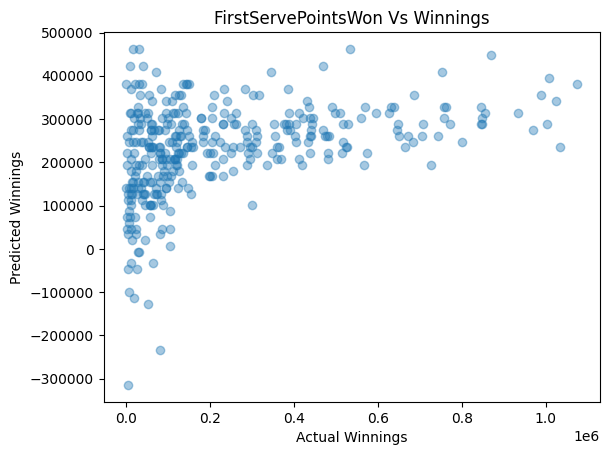

In [9]:
# Predict outcome
prediction = model.predict(X_test)
plt.scatter(Y_test, prediction, alpha=0.4)
plt.title('FirstServePointsWon Vs Winnings')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

The plot above shows the `FirstServePointsWon` feature vs `Winnings` with a model score of 14% indicating `FirstServePointsWon` alone is not a strong predictor of `Winnings`. The plot shows a large spread of predicted values for actual winnings, especially for lower values. This implies the model struggles to capture the relationship accurately, particularly for smaller winnings. Negative predictions are visible below `0` of `Predicted Winnings`, which may not make sense in this context. This suggests the model has some flaws or the data preprocessing might need adjustments.

# Plot different features against Winnings outcome
I'll be plotting features `FirstServe`, `SecondServePointsWon`, and `BreakPointsOpportunities` against the `Winnings` outcome and compare performances. Which model has the best performance?

Model score using FirstServe: 0.0048901069363164185


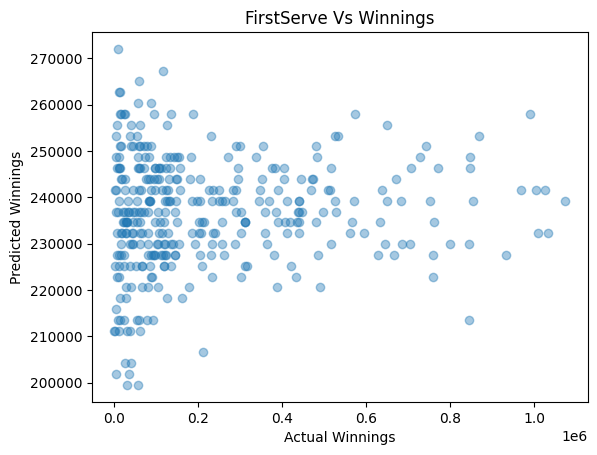

Model score using SecondServePointsWon: 0.10444046424264208


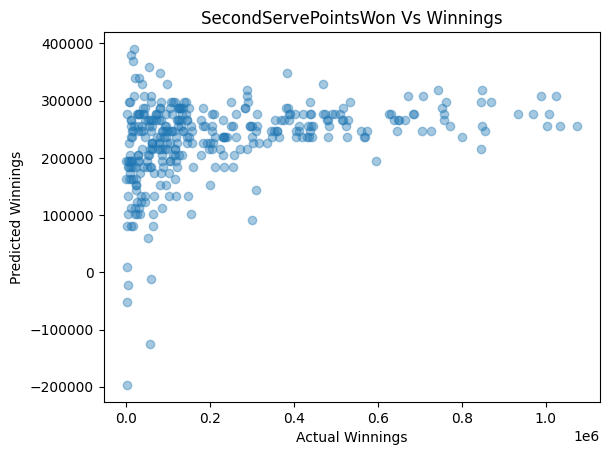

Model score using BreakPointsOpportunities: 0.7865551696389492


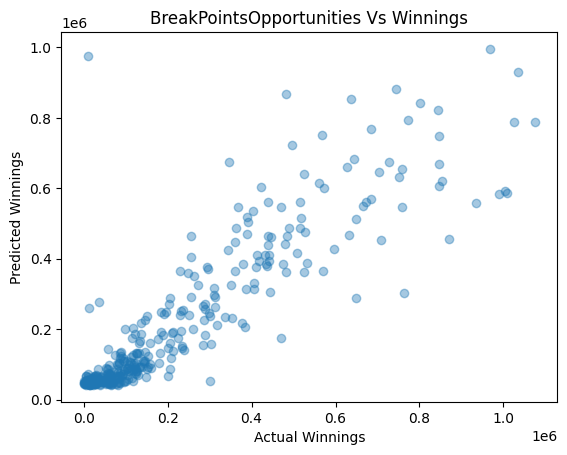

In [10]:
# Create few more linear regression models that use one feature to predict one of the outcomes.

features_list = ['FirstServe', 'SecondServePointsWon', 'BreakPointsOpportunities']

for feature in features_list:
    plt.clf() # Clear previous plot
    
    # Select the feature
    features = tennis_df[[feature]]
    outcome = tennis_df[['Winnings']]
    
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(features, outcome, train_size = 0.8, random_state = 42)
    
    # Create and fit model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Evaluate model
    score = model.score(X_test, Y_test)
    print(f'Model score using {feature}: {score}')
    
    # Predict outcome
    prediction = model.predict(X_test)
    plt.scatter(Y_test, prediction, alpha=0.4)
    plt.title(f'{feature} Vs Winnings')
    plt.xlabel('Actual Winnings')
    plt.ylabel('Predicted Winnings')
    plt.show()

# Best model

The plots above shows three models with their scores: 
* `FirstServe` (R^2 = 0.0049) 
<br>

* `SecondServePointsWon` (R^2 = 0.1044)
<br>

* `BreakPointsOpportunities` (R^2 = 0.7866)

The `BreakPointsOpportunities` model has the best performance, as indicated by its much higher R^2 score compared to the others. This feature is likely the most influential predictor of `Winnings` among the three.

# Creating linear regression models using two features

I'll create two linear regression models using two features `['BreakPointsOpportunities', 'FirstServePointsWon']` and `['Aces', 'FirstServePointsWon']` to predict yearly earnings. Which set of two features results in the best model?

Model score using BreakPointsOpportunities and FirstServePointsWon: 0.7954505672206645


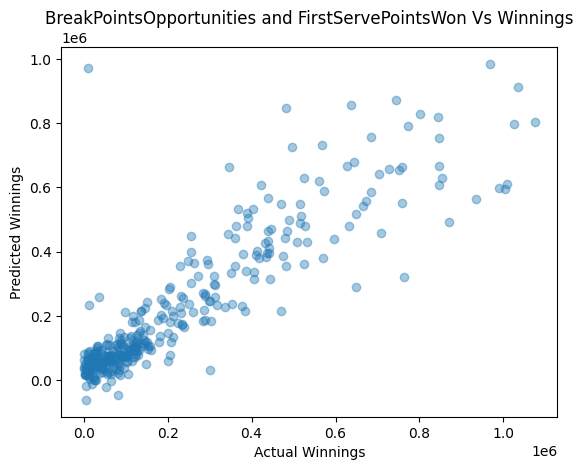

Model score using Aces and FirstServePointsWon: 0.5925067080024593


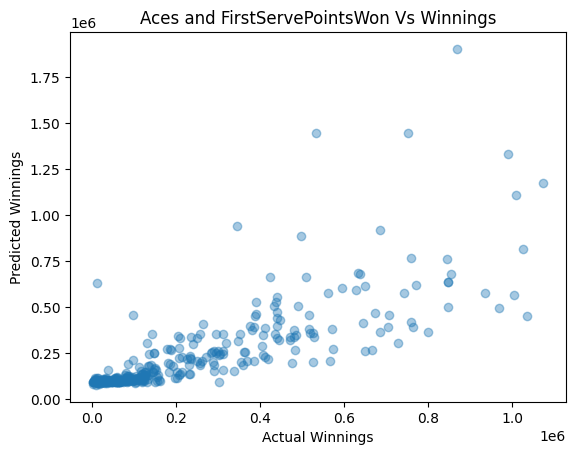

<Figure size 640x480 with 0 Axes>

In [11]:
# Create a few more linear regression models that use two features to predict yearly earnings.

double_features_list = [['BreakPointsOpportunities', 'FirstServePointsWon'], ['Aces', 'FirstServePointsWon']]

for double_feature in double_features_list:
  plt.clf()
  double_features = tennis_df[double_feature]
  outcome = tennis_df[['Winnings']]

  # Split the data
  X_train, X_test, Y_train, Y_test = train_test_split(double_features, outcome, train_size = 0.8, random_state = 42)

  # Create and fit the model
  model = LinearRegression()
  model.fit(X_train, Y_train)
    
  # Evaluate model
  score = model.score(X_test, Y_test)
  print(f'Model score using {" and ".join(double_feature)}: {score}') # the code {" and ".join(double_feature)} 
                                                                       # will remove the square brackets for the model score
                                                                       # and title output
  # Predict and plot
  prediction = model.predict(X_test)
  plt.scatter(Y_test, prediction, alpha=0.4)
  plt.title(f'{" and ".join(double_feature)} Vs Winnings')
  plt.xlabel('Actual Winnings')
  plt.ylabel('Predicted Winnings')
  plt.show()
  plt.clf()

# Best double features model

The plots above shows two double features models with their scores:

* `BreakPointsOpportunities` and `FirstServePointsWon` (R^2 = 0.7955) 
<br>

* `Aces` and `FirstServePointsWon` (R^2 = 0.5925)

The model using `BreakPointsOpportunities` and `FirstServePointsWon` as features results in the best performance due to it's R^2 score of `0.7955` being the highest from the model using `Aces` and `FirstServePointsWon` with a score of `0.5925`. The feature combination of the first model provides a better fit and predictive capability for explaining `Winnings` compared to the second model.

# Creating linear regression models using multiple features and checking their coefficients
I'll create two linear regression models using multiple features to predict yearly earnings. Which set of multiple features results in the best model? What features are most important for being a successful tennis player?

Coefficients for ['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon']: [[ 294153.36046245 1191905.41087701  833295.0627455   542043.21610256
   484575.54746291]]
Mutiple Features 1 Vs Winnings score: 0.23292140787092186


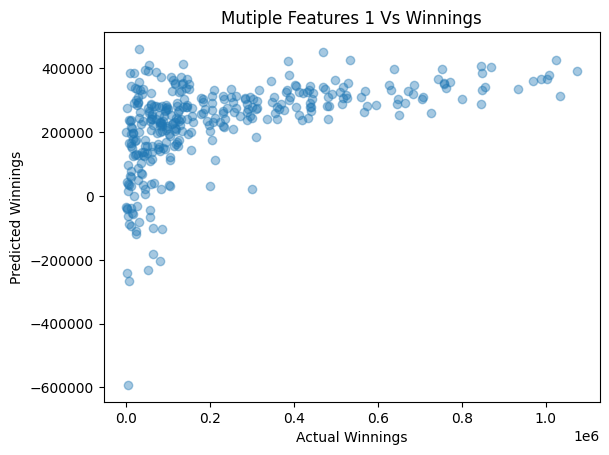

Coefficients for ['Aces', 'BreakPointsOpportunities', 'ReturnGamesPlayed', 'ReturnGamesWon', 'TotalServicePointsWon']: [[  175.8227856    698.95001138   562.94923122  2757.27275325
  91582.63594784]]
Mutiple Features 2 Vs Winnings score: 0.8306592745057101


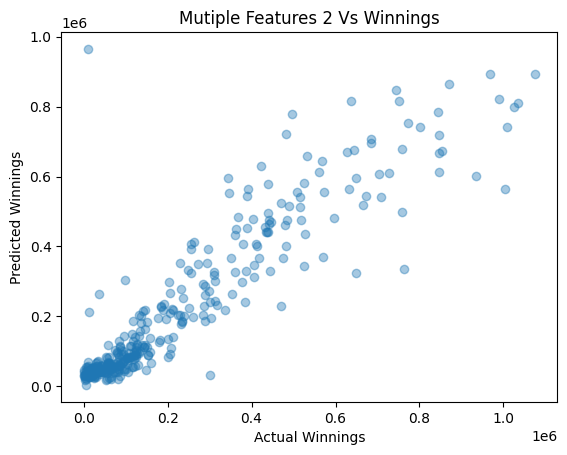

In [12]:
# Create a few more linear regression models to select multiple features to predict yearly earnings

multi_features_list = [['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon'], ['Aces','BreakPointsOpportunities','ReturnGamesPlayed','ReturnGamesWon',
'TotalServicePointsWon']]

titles = ['Mutiple Features 1 Vs Winnings', 'Mutiple Features 2 Vs Winnings'] # This code will add two different title names
                                                                              # for two models respectively when using
                                                                              # plt.title(title)

for multi_feature, title in zip(multi_features_list, titles):
    plt.clf()
    multi_features = tennis_df[multi_feature]
    outcome = tennis_df[['Winnings']]
    
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(multi_features, outcome, train_size=0.8, random_state = 42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Check coefficients for each feature
    coefficients = model.coef_
    print(f'Coefficients for {multi_feature}: {coefficients}') # This code maps each feature to their coefficients in the
                                                               # output respectively
    
    # Evaluate model
    score = model.score(X_test, Y_test)
    print(f'{title} score: {score}')
    
    # Predict and plot
    predictions = model.predict(X_test)
    plt.scatter(Y_test, predictions, alpha=0.4)
    plt.title(title) 
    plt.xlabel('Actual Winnings')
    plt.ylabel('Predicted Winnings')
    plt.show()

# Best multiple features model

The plots above shows two multiple features models with their scores:

* `Multiple Features 1` (R^2 = 0.2329)
<br>

* `Multiple Features 2` (R^2 = 0.8307)

The second model, using `Aces`, `BreakPointsOpportunities`, `ReturnGamesPlayed`, `ReturnGamesWon`, and `TotalServicePointsWon`, is the better model due to its much higher R^2 score of `0.8307`. This indicates it captures the relationship between the features and `Winnings` far better than the first model.

# Features Most Important for Success
From the second model:

* `TotalServicePointsWon` is the most critical feature with a coefficient of `91582.6359`, indicating the importance of consistently winning service points in determining player success.
<br>

* `ReturnGamesWon` and `BreakPointsOpportunities` with coefficients of `2757.2727` and `698.9500` also play key roles, emphasizing the importance of breaking opponents' serves and winning return games.
<br>
* `Aces` with a coefficient of `175.8227` contributes, but its impact is smaller compared to the above features.

These insights suggest that success in tennis is strongly tied to:

* Consistency in winning service and return points.
<br>

* Effectiveness in converting break opportunities.